In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.vq import kmeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from matplotlib import cm
from sklearn.cluster import KMeans 

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn import preprocessing
from math import sqrt
print('Libraries imported.')

Libraries imported.


## Q1) K-Means Clustering

K-means clustering is a method which aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

In this question you will use K-Means clustering for 2 different examples
1. Implementing _k_-means clustering on a randomly generated dataset from scratch.
2. Implementing _k_-means using the SK-Learn library for cluster segmentation and profile building.

### 1. *k*-means on a Randomly Generated Dataset
30 data points belonging to 2 different clusters have been assigned  
x1 is the first feature and x2 the second

In [2]:
x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]

In [3]:
centers = [[-2, 2], [2, -2]]
colors_map = np.array(['b', 'r'])

#### Define a function that assigns each datapoint to a cluster
In this first part of Q1 you will have to implement K-Means Clustering from scratch. As you have studied in class that centers are first chosen at random, however here we have initialized the centers for you as `[[-2,-2],[-2,-2]]` for ease in checking which also means we have already chosen the number of clusters to equal 2.

In the first function `assign_members` you will take both features along with the centers as parameters and will assign the colours and class of points to both clusters according to their centers. You will then return colours and class of points to feed into the next function.

Hint: Think of class of points as a boolean array for each cluster

In [4]:
# This function returns euclidean distance

def get_distance(x, y, cx, cy):
    return sqrt((cx - x)**2 + (cy - y)**2)

In [5]:
def assign_members(x1, x2, centers):
    class_of_points = []
    colors = []
    for i in range(len(x1)):
        distances = []
        for center in centers:
            distances.append(get_distance(x1[i], x2[i], center[0], center[1]))
        
        min_ind = distances.index(min(distances))
        class_of_points.append(min_ind + 1)
        colors.append(colors_map[min_ind])
        
    return colors, class_of_points

#### Define a function that updates the centroid of each cluster

In the `update_centers` function you will take along with both features the class of points as parameter and returns the updated centers

In [6]:
def update_centers(x1, x2, class_of_points):
    cluster1_X = [x1[i] for i in range(len(class_of_points)) if class_of_points[i] == 1]
    cluster1_Y = [x2[i] for i in range(len(class_of_points)) if class_of_points[i] == 1]
    cluster2_X = [x1[i] for i in range(len(class_of_points)) if class_of_points[i] == 2]
    cluster2_Y = [x2[i] for i in range(len(class_of_points)) if class_of_points[i] == 2]
    
    updated_centers = []
    updated_centers.append([np.mean(cluster1_X), np.mean(cluster1_Y)])
    updated_centers.append([np.mean(cluster2_X), np.mean(cluster2_Y)])
    
    return updated_centers

You dont have to implement the `plot_points` function as it has already been implemented for you. All you have to know is it takes centers and an array of colours and a figure title as its parameters. However if you wish to change it then you may do so.

In [7]:
# Dont change this function
def plot_points(centroids=None, colors='g', figure_title=None):
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    ax.set_title(figure_title, fontsize=24)

    plt.show()

#### Initialize data points and centers and plot

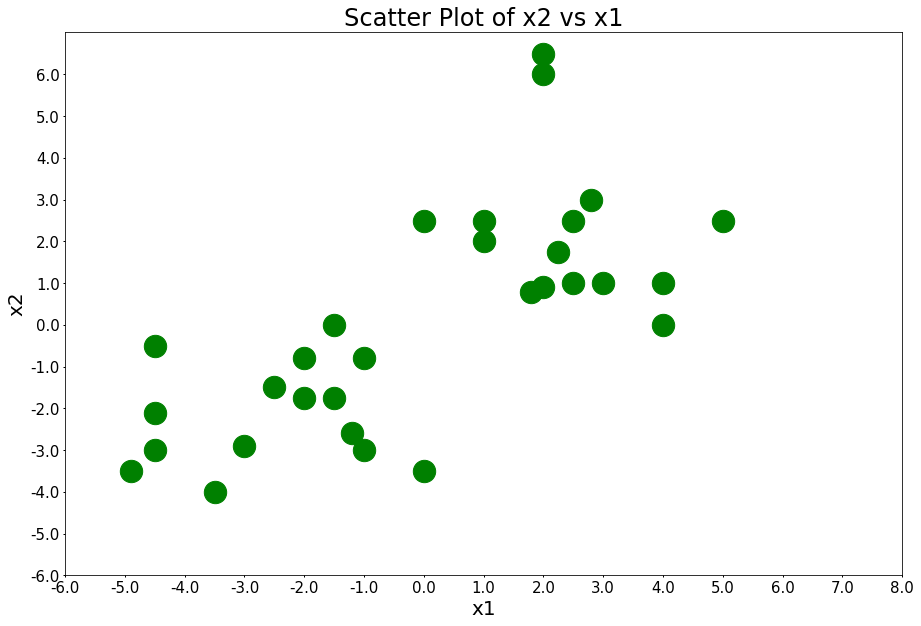

In [8]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

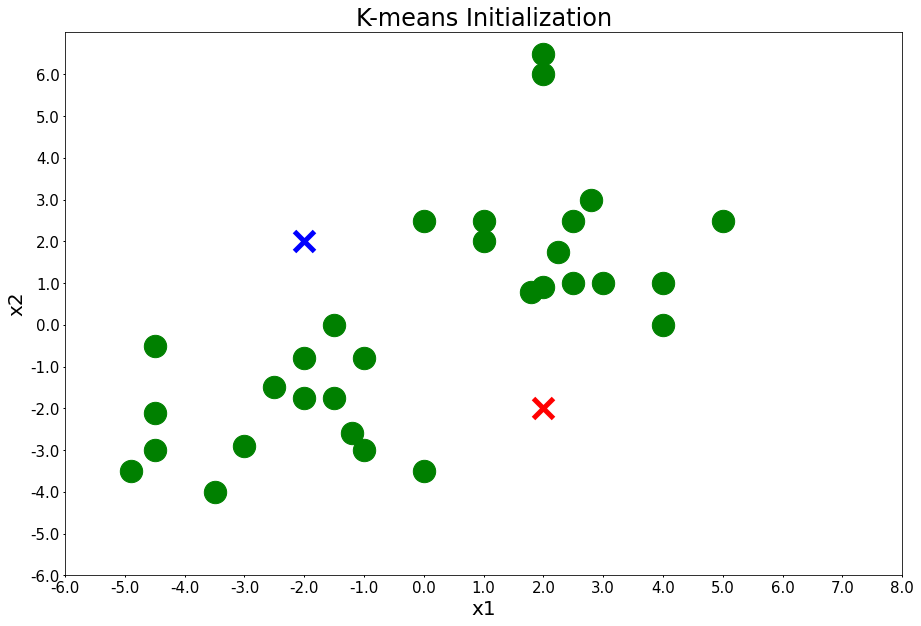

In [9]:
plot_points(centers, figure_title='K-means Initialization')

#### Run the iterations 4 times and plot each cluster assignment and plot each center update
Now use the functions that you have implemented and fill out the for loop  
You have to plot two scatter plot for each iteration, one after the cluster assignment and the second after updating the centers   
The last two plots should look like this after running it for 4 iterations after which it converges 

![Cluster Assignment](ClusterAssignment.PNG)
![Centroid Update](CenterUpdate.PNG)


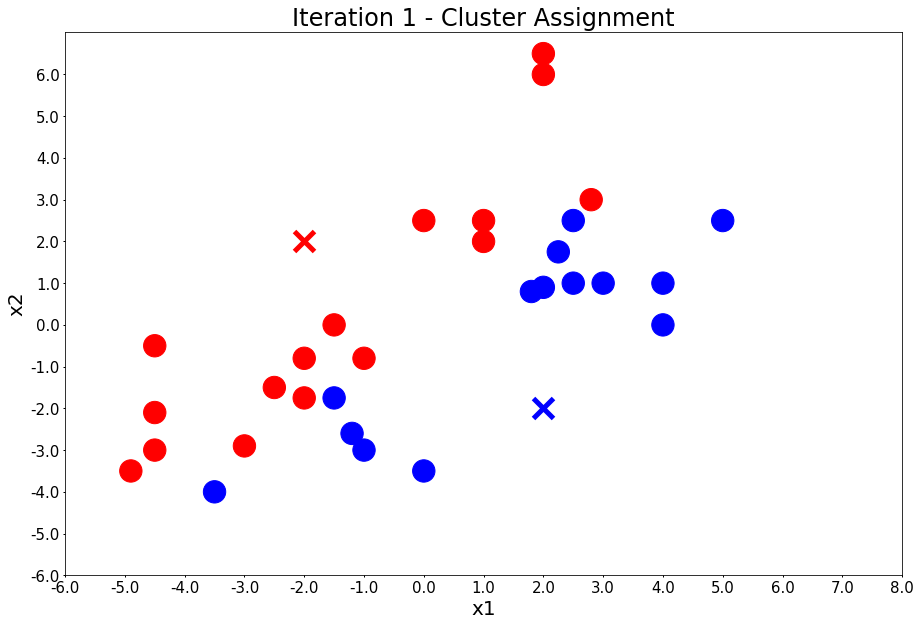

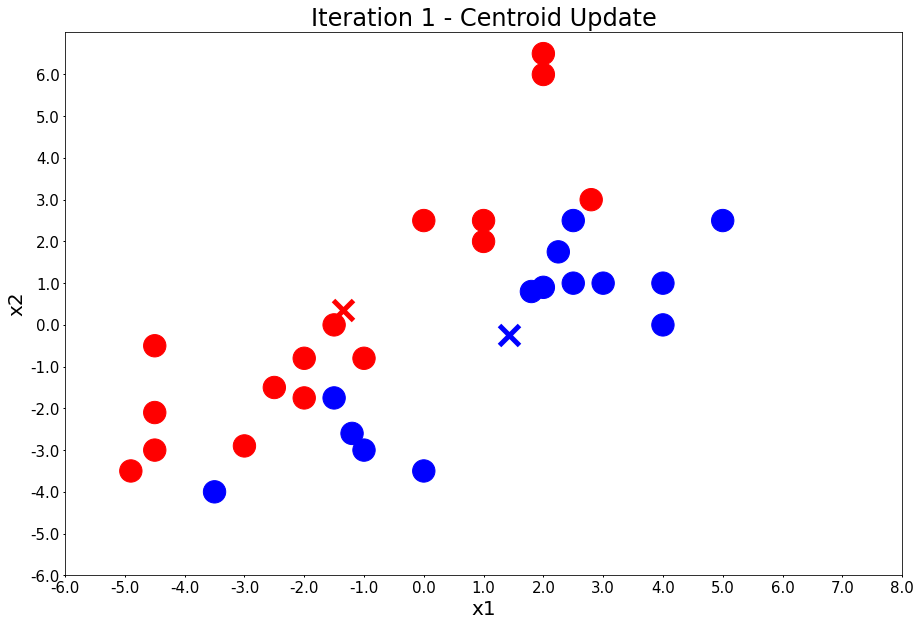

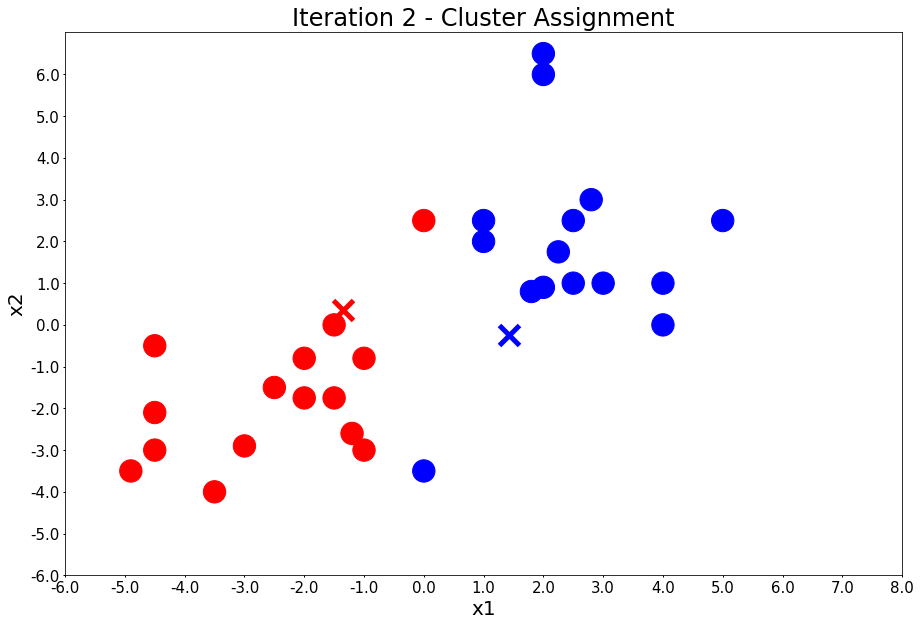

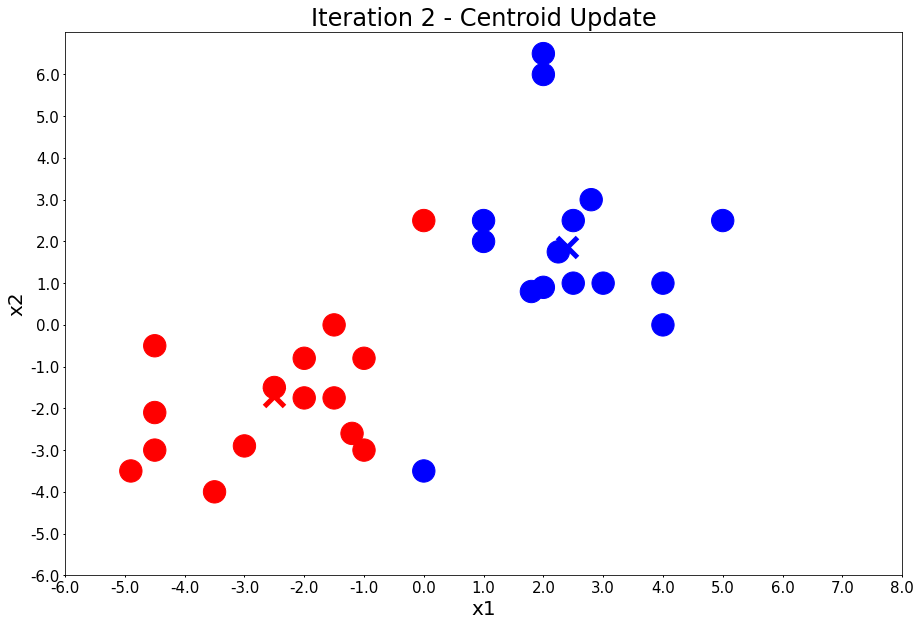

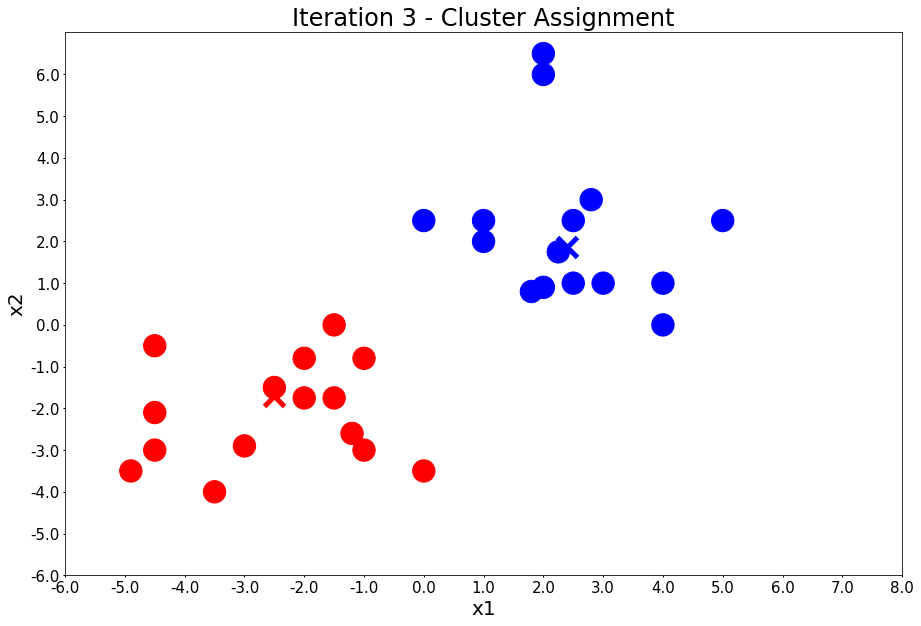

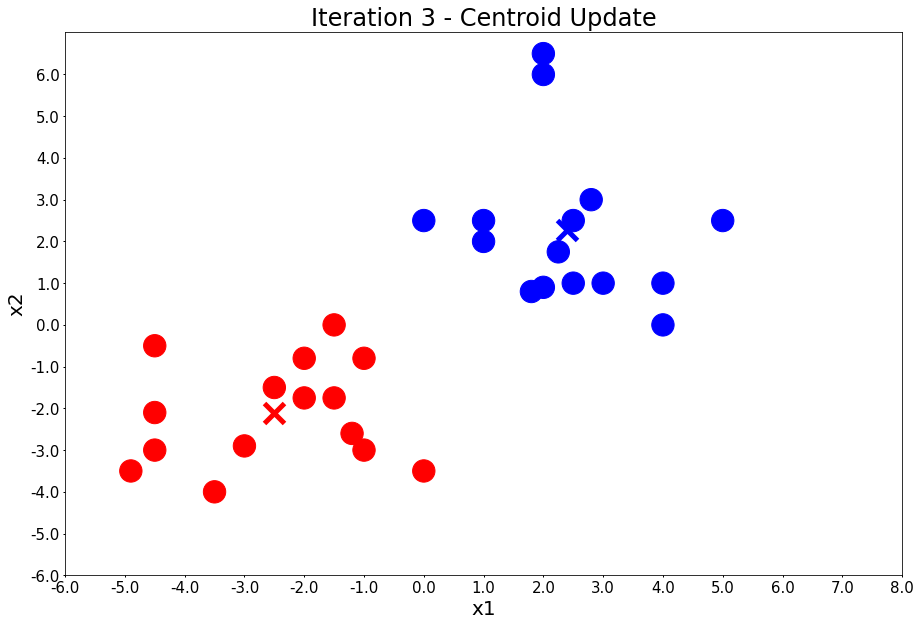

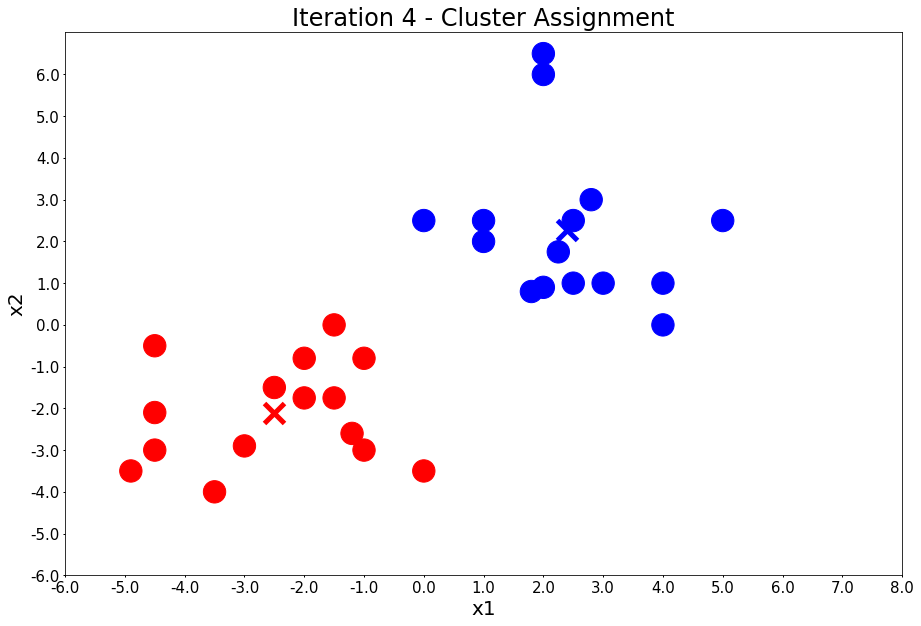

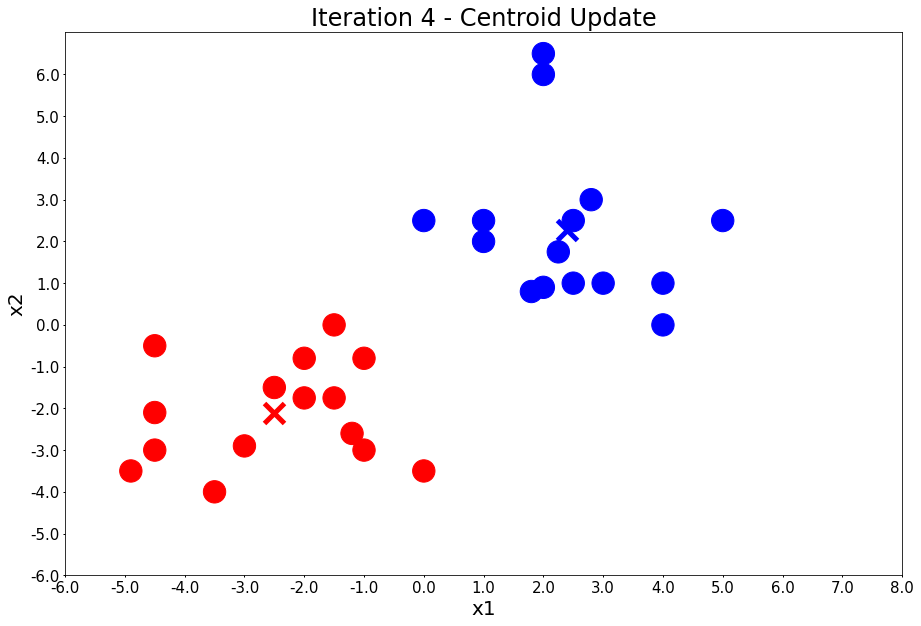

In [10]:
centers = [[2, -2], [-2, 2]]
number_of_iterations = 4

for i in range(0, number_of_iterations):
    # Your code goes here
    
    colors, class_of_points = assign_members(x1, x2, centers)
    plot_points(centers, colors, figure_title="Iteration {} - Cluster Assignment".format(i+1))
    centers = update_centers(x1, x2, class_of_points)
    plot_points(centers, colors, figure_title="Iteration {} - Centroid Update".format(i+1))

### 2. *k*-means for Cluster Segmentation and Profile Building

**Step 1)** Read the customer_segemntation csv file into a dataframe and display the first 5 rows

In [11]:
# Your code goes here

df = pd.read_csv('customer_segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


**Step 2)** Drop any columns which will not be of any use (if any) and display the first 5 rows

In [12]:
# Your code goes here
df = df .drop(['Customer Id', 'Address'], 1)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


**Question:** Explain why you dropped those columns (if any)?

**Answer:**   
I dropped `Customer Id` and `Address`. I did so because `Customer Id` did not have much to contribute to the clustering. It was a just ascending interger to identify rows. `Address` was a string which did not make much sense to be used in clustering.

**Step 3)** Check to see if there any NaN entries. Show the count of Nan entries for each column

In [13]:
# Your code goes here

df.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

**Step 4)** You can either drop these Nan entries or fill in the missing values. Show the first 5 rows and the count of Nan entries for each column after you have either dropped or filled the missing values

In [14]:
# I decided to drop NaN enteries

df = df.dropna()
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


**Question:** Which method did you use to finish the NaN entries? And why is that method better than the other for K-Means clustering?

**Answer:**   
I droped the rows containing NaN values because the only coulumn which had NaN values is `Defaulted`. This attribute can have only binary values (1.0 or 0.0). So filling it with mean does not make much sense. Similarly, backwards and forward fills cannot be applied to it. And lastly using mode would also skew the data.

**Step 5)** Normalize your data and convert it into a numpy array. Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally    
Hint: To Normalize checkout SKLearn library for any inbuilt function

In [15]:
# Your code goes here

X = None # Normalized numpy array, used later in the visualization step
temp = df.to_numpy()
X = df.to_numpy()
W = preprocessing.normalize(temp)

**Step 6)** Here you will now use SK Learn's library for K-Means. 
You will use 3 clusters here.
Initailize the `n_init` parameter to equal 12

In [16]:
# Your code goes here

# Initialize
kmeans = KMeans(n_clusters=3, n_init=12)
# Fit
kmeans.fit(W)
# Print labels
labels = kmeans.labels_
print(labels)

[0 2 2 0 2 2 2 2 2 0 1 0 0 0 0 2 2 2 0 2 2 2 2 2 2 0 1 0 1 2 1 2 1 1 0 2 1
 1 2 1 0 0 2 0 2 0 2 2 0 2 2 0 1 1 2 2 2 0 1 0 0 2 2 2 2 0 0 1 2 0 0 1 0 0
 1 0 1 2 0 1 1 0 1 2 2 1 2 1 0 1 2 0 1 2 0 2 2 2 0 1 0 0 2 0 0 1 0 0 1 0 0
 2 1 2 1 0 2 0 0 0 2 2 2 1 2 1 2 2 1 0 2 0 0 0 2 1 0 2 0 1 2 0 0 2 0 0 0 2
 1 2 0 0 1 0 2 0 2 2 0 2 1 0 0 0 2 2 0 0 2 0 1 2 2 1 2 0 0 0 0 2 0 1 0 0 1
 2 2 0 1 2 2 0 0 2 2 2 1 0 2 0 1 2 1 0 0 0 0 2 2 2 0 2 0 0 1 0 0 0 1 2 0 0
 2 1 2 2 2 2 2 0 0 1 2 1 1 0 2 2 2 2 0 0 1 2 0 1 0 2 1 0 0 1 0 2 0 2 0 2 1
 0 2 2 2 2 1 0 0 1 0 2 0 0 2 1 2 0 1 2 0 0 2 0 0 0 0 0 2 0 1 2 1 0 0 2 1 2
 2 2 2 0 0 2 0 1 1 0 0 0 0 0 1 2 0 2 1 0 0 1 2 0 1 1 2 0 1 0 1 1 1 0 0 0 2
 2 2 1 2 0 1 0 2 2 0 0 0 0 0 0 2 1 1 2 0 0 0 2 0 0 0 0 2 2 2 2 0 2 2 0 0 0
 2 0 1 0 2 0 2 1 1 2 1 2 0 2 0 2 0 2 0 0 2 0 0 1 1 2 1 0 0 0 2 1 0 1 2 0 0
 0 1 2 0 2 1 0 2 0 1 2 1 1 2 0 2 0 1 2 1 2 2 2 1 0 0 0 1 1 1 2 0 0 0 0 0 0
 2 0 0 2 2 1 2 0 1 0 2 0 1 0 2 1 2 0 2 0 2 0 2 2 0 0 2 1 1 0 0 0 2 2 0 0 1
 2 0 0 2 1 1 0 2 0 0 2 1 

**Question:** Here you have been provided with the number of clusters from before. Give two methods where you can find out the optimal number of clusters?  
**Answer:**  
1. Elbow Method
2. X-means Clustering
3. Information criterion approach
4. The silhouette method
5. Cross-validation

**Step 7)** Add a column to your original dataframe with these labels and name the column `Labels`

In [17]:
# Your code goes here

df['Labels'] = labels
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,2
2,33,2,10,57,6.111,5.802,1.0,20.9,2
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,2


**Step 8)** Visualize your clusters. X is the normalized numpy array. You dont need to implement this, it has already been done for you. The following image shows what the result should more or less look like.
![Visual](Clusters.PNG)

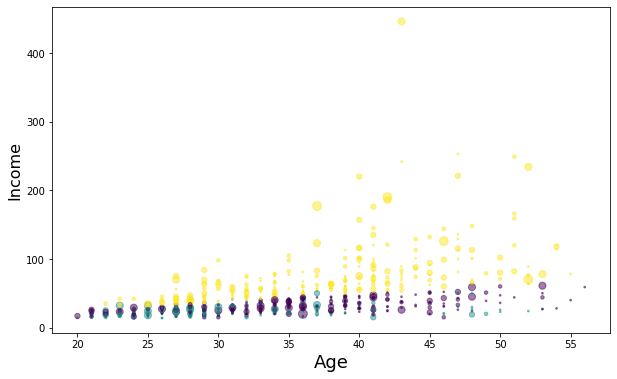

In [18]:
area = np.pi * ( X[:, 1])**2  
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

**Step 9)** Here you will do profile building

K-means will partition your customers into three groups since we specified the algorithm to generate 3 clusters. The customers in each cluster are similar to each other in terms of the features included in the dataset.

Now we can create a profile for each group, considering the common characteristics of each cluster. 

Compare all 3 clusters and give main characterstics for each profile/cluster.  
For E.g The group which is older in `age` have a higher `income`

Hint: Use groupby

In [19]:
# Your code goes here

df.groupby("Labels").mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Labels,,,,,,,,
0,34.346535,1.617162,6.821782,30.283828,0.736277,1.487703,0.184818,6.919142
1,31.270270,1.608108,3.736486,24.040541,1.430331,3.026209,0.533784,17.568919
2,37.618474,1.919679,13.060241,77.056225,2.621345,4.988289,0.192771,9.982731


Characteristics for each cluster  
1. `Age`, `Edu`, `Years Employed`, and `Income` are all low. They have medium `Card Debt` and `Other Debt` but `Defaulted` high compared to other groups. Due to low income and high debts,  `DebtIncomeRatio` is also high.
2. This is a more stable group. Medium `Age`, `Edu`, `Years Employed`, and `Income`. The debt values are also lowest.
3. Althought this group is older and earns the most and has been wordking the longest, it has medium values for debts. 

**Question:** Give 2 advantages and 2 disavantages of using K Means Clustering over say a Hierarchal Clustering Method such a Agglomerative Clustering or a Density Based Clustering Method such as DB-Scan?

**Advantages**
1. KMeans is much faster and scalable than DBScan
2. Generalizes to clusters of different shapes and sizes, such as elliptical clusters

**Disadvantages**
1. K-means need the number of clusters hidden in the dataset
2. It is dependent of initial values

## Q2) Hierarchical  Clustering
Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. There are two types of hierarchical clustering algorithms:

*   Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters.
*   Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

In this question, you will be performing Agglomerative Clustering on a customers shopping habits dataset and then labelling the clusters.

**Question** Load the dataset and look for possible missing values. Handle them appropriately. (If any) 

In [20]:
### Code here

df = pd.read_csv('customers_shopping.csv')

# Check for null values
print("The number of null values is: {}".format(df.isnull().sum().sum()))

# Since there are no null values, there is no need to handle them

# Make a new dataset which contains only annual income and spending score
reduced_dataset = df.iloc[:, [3,4]]
X = reduced_dataset.values

The number of null values is: 0


**Dendrogram** is used to visualize the history of groupings and figure out the optimal number of clusters.

**Question:** Draw **two dendograms using two different linkage methods**. *Comment on the cause of differences between the two*.

Pick **one** of the above which you find to be the best. Mention the **number of clusters** and justify your answer.

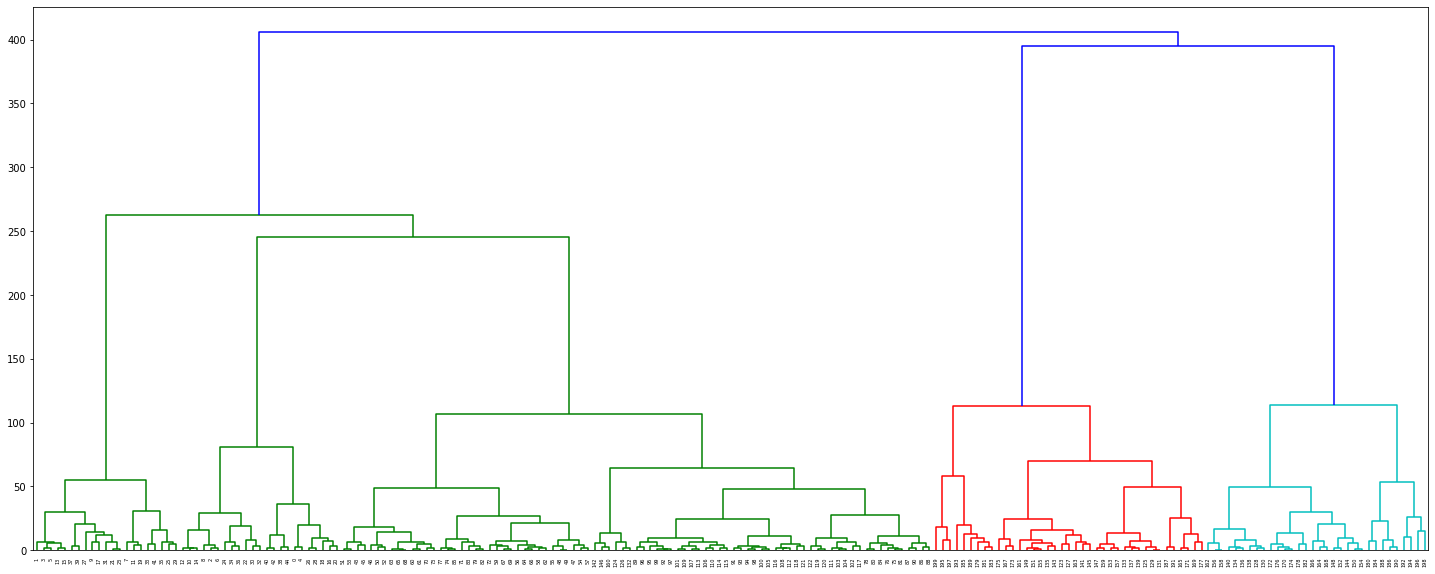

In [21]:
#### Draw dendrogram here

Z1 = sch.linkage(reduced_dataset, 'ward')
fig = plt.figure(figsize=(25, 10))
dn1 = sch.dendrogram(Z1)
plt.show()

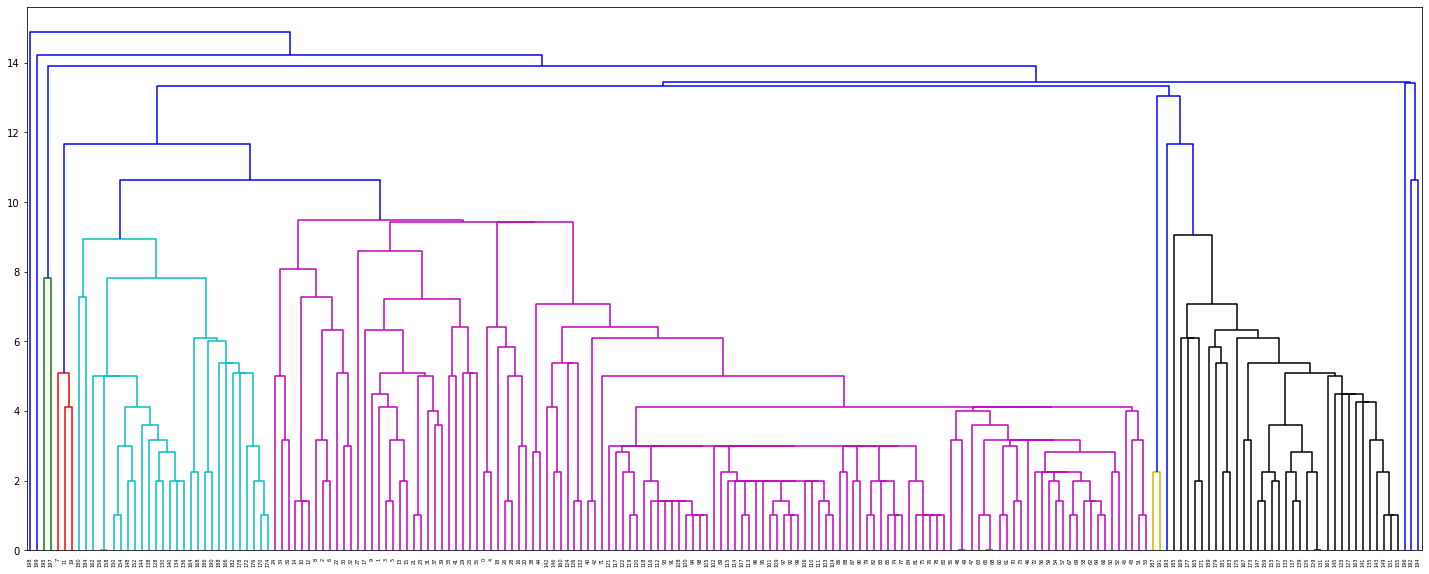

In [22]:
#### Draw dendrogram here

Z2 = sch.linkage(reduced_dataset, 'single')
fig = plt.figure(figsize=(25, 10))
dn2 = sch.dendrogram(Z2)
plt.show()

### Cause of Differences:   
The difference is because of the formulae used for distance calculation. `single` uses Nearest Point Algorithm to calculate the distance, whereas `ward` uses Ward variance minimization algorithm to calculate the distance. Ward's formula is much more complex.

### Optimal Number of Clusters: 

5

### Justification:
By seeing the dendogram for Ward's method, we can easily see that dataset immediately branches off into 5 different hierarchies. These hierarchies are high enough on y-axis to be considered a cluster. 

**Question:** Create an agglomerative cluster using your optimal number of clusters and plot a scatter diagram

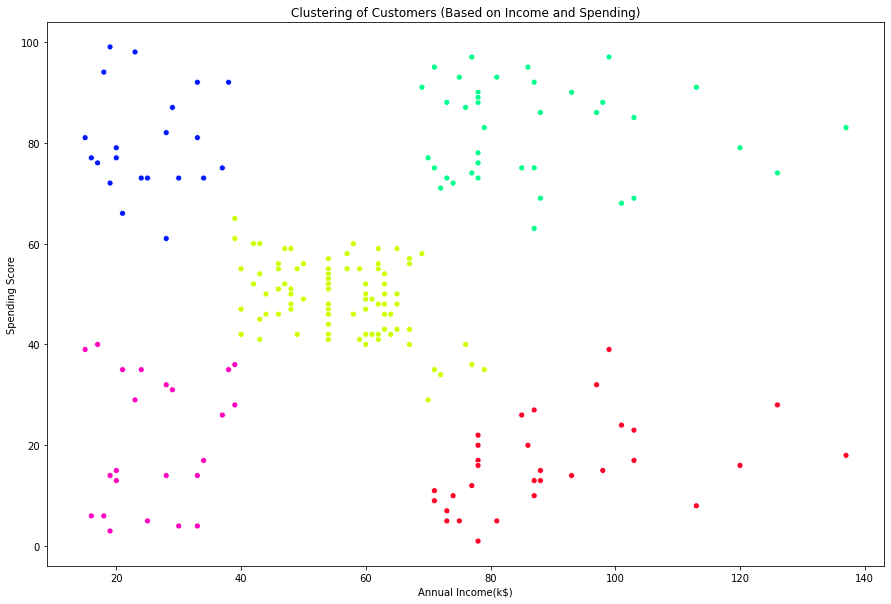

In [23]:
### write your code here

num_clusters = 5
clustering = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward').fit(X)

plt.figure(figsize=(15, 10))
sns.scatterplot(X[:, 0], X[:, 1], hue=clustering.labels_, legend=False, palette='gist_rainbow')

plt.title('Clustering of Customers (Based on Income and Spending)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score')

plt.show()

**Question:** What do each of the clusters represent?

**Answer:**
There are 5 clusters based on annual income and spending score.
Let's assume the following mapping of clusters:   
Red: Cluster 1   
Yellow: Cluster 2   
Green: Cluster 3   
Blue: Cluster 4   
Magenta: Cluster 5   

Cluster 1: These are relatively well off people but spend money scarcely.   
Cluster 2: These people earn average and spend average as well.   
Cluster 3: These are rich people who earn more and spend more as well.   
Cluster 4: These are the people who earn relatively less and spend too much. Basically wasteful.   
Cluster 5: These people earn less and spend less as well. They allocate their resources carefully.   